# Schools matter: the importance of school factors in explaining academic performance.
##  by Shymaa Abd El-Khaleq


## Investigation Overview

<h4> School performance is an issue that deeply concerns students, parents,teachers and authorities. <br> <br>
In this analysis we will be interested in finding out how schools matter and the effect of school factors on academic performance.



## Dataset Overview

<h4> The Program for International Student Assessment (PISA) is a worldwide study developed by the Organization for Economic Co-operation and Development (OECD) which examines the skills of 15-year-old school students around the world. The study assesses students' mathematics, science, and reading skills and contains a wealth of information on students' background, their school and the organization of education systems. For most countries, the sample is around 5,000 students, but in some countries the number is even higher. In total, the PISA 2012 dataset contains data on 485 490 pupils.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('pisa_clean.csv')
df.shape

(449700, 27)

In [3]:
df['grade']=df[['math','science','reading']].mean(axis=1)


## let's take a look at Students gender distribution


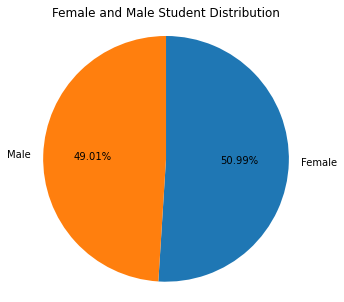

In [4]:

#plot pie chart of female and male students distribution:
plt.figure(figsize=(8,5))
data = df['gender'].value_counts()
plt.pie(data,labels = data.index, startangle = 90, counterclock = False, autopct='%1.2f%%')
plt.title('Female and Male Student Distribution')
plt.axis('square');


<h4> There is slightly more Female students than male students,but Overall dataset can be considered unbiased.

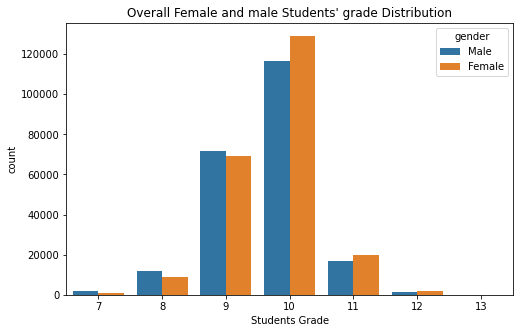

In [5]:
plt.figure(figsize=(8,5))

sb.countplot(data = df, x = 'international_grade', hue = 'gender')
plt.title("Overall Female and male Students' grade Distribution")
plt.xlabel('Students Grade');

<h4>  We can see from the above figure that female students have better grades, Although Female and Male students have the same average grade and range,<br>
  

# The Impact of INEQUALITY  

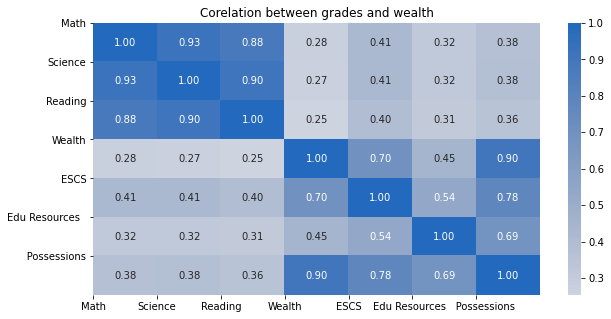

In [6]:
plt.figure(figsize=(10,5))

sb.heatmap(df[['math' ,'science','reading', 'wealth'  ,'ESCS','h_edu_res','home_poss']].corr(),
           annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
t = ['      Possessions', 'Edu Resources  ', 'ESCS', 'Wealth','Reading','Science','Math']
plt.yticks([6,5,4,3,2,1,0],t, rotation=0)
plt.xticks([6,5,4,3,2,1,0],t, rotation=0)
plt.title('Corelation between grades and wealth');



<h4> Although in this analysis we are interested in finding how schools matters, We can't oversee the strong positive correlation and huge impact of wealth,  home possessions and home resources on Math, Science and Reading grades.

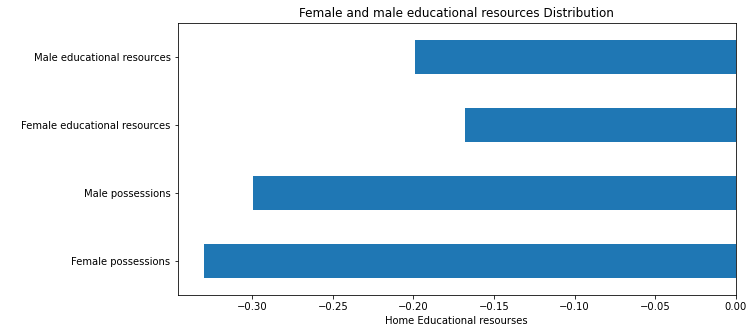

In [7]:
#plotting students gender with mean educational resources& home possessions 
plt.figure(figsize=(10,5))
df.groupby('gender')[['home_poss','h_edu_res']].mean().unstack('gender').plot(kind='barh',rot=0,width=0.5,)
#setting title and axes
plt.title("Female and male educational resources Distribution")
yt = ['Female possessions','Male possessions' ,'Female educational resources','Male educational resources']
plt.yticks([0,1,2,3],yt)
plt.ylabel(' ')
plt.xlabel('Home Educational resourses');

<h4>Interestingly while male students owns more home possessions by 0.3, Female students have more home educational resources by 0.3. <br><br>
This can be explained by parents reluctance to spend on female's home possessions and instead choose to finance more educational resources.

## How does School Factors affect Student Grade

#### There is more than few school attributes in this dataset, We will select relevant factors in three main groups:<br>
- School_Student Relation.
- Math Classroom Factors.
- General School Factors.

In [8]:
# School_id column resets for each country

#Change dtype of school_id:
df['school_id'] = df['school_id'].astype(str)

#Create new column with unique id for each school
df['school']= df['country']+df['school_id']

#create new df with school average value:
df2 = df.groupby('school').mean()

## School_Student Relation:

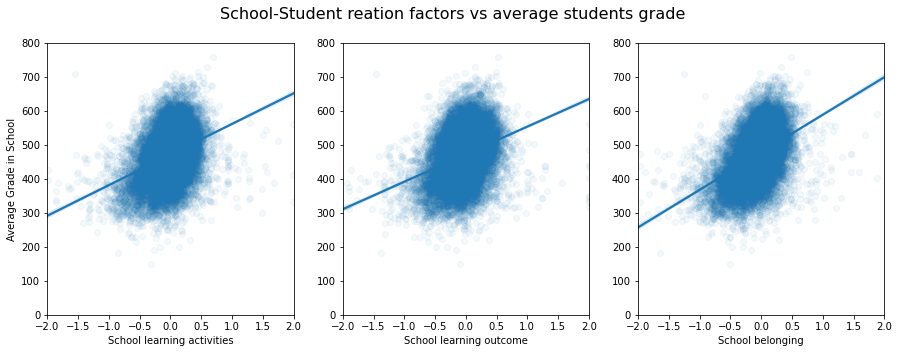

In [9]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sb.regplot(data = df2, y = 'grade', x = 'sch_att_outcome', scatter_kws={'alpha':1/20})
plt.ylim(0,800)
plt.xlim(-2,2)
plt.ylabel('Average Grade in School')
plt.xlabel('School learning activities')

plt.subplot(1,3,2)
sb.regplot(data = df2, y = 'grade', x = 'sch_att_activity', scatter_kws={'alpha':1/20})
plt.ylim(0,800)
plt.xlim(-2,2)
plt.ylabel('')
plt.xlabel('School learning outcome')


plt.subplot(1,3,3)
sb.regplot(data = df2, y = 'grade', x = 'sch_belonging', scatter_kws={'alpha':1/20})
plt.ylim(0,800)
plt.xlim(-2,2)
plt.ylabel('')
plt.xlabel('School belonging')


plt.suptitle('School-Student reation factors vs average students grade', fontsize=16)

# Display a figure.
plt.show();

<h4> Students' active participation through out the lessons is has positive relation to students grades<br><br>
    Student attitude toward School have high influence in average students grade, specially sense of belonging toward schools. 
    <br><br>
    This shows the importance of school environment in students' moral and grades as motivated students strive for success

## General School Factors.

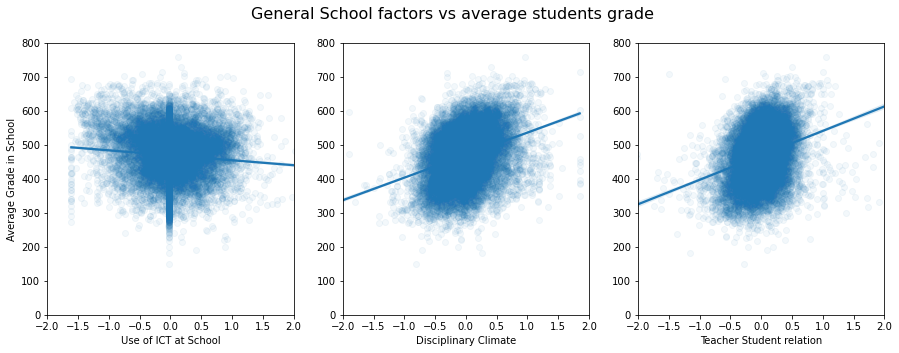

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sb.regplot(data = df2, y = 'grade', x = 'ict', scatter_kws={'alpha':1/20})
plt.ylim(0,800)
plt.xlim(-2,2)
plt.ylabel('Average Grade in School')
plt.xlabel('Use of ICT at School')

plt.subplot(1,3,2)
sb.regplot(data = df2, y = 'grade', x = 'disciplinary_cli', scatter_kws={'alpha':1/20})
plt.ylim(0,800)
plt.xlim(-2,2)
plt.ylabel(' ')
plt.xlabel('Disciplinary Climate')


plt.subplot(1,3,3)
sb.regplot(data = df2, y = 'grade', x = 'teacher_student', scatter_kws={'alpha':1/20})
plt.ylim(0,800)
plt.xlim(-2,2)
plt.ylabel(' ')
plt.xlabel('Teacher Student relation')


plt.suptitle('General School factors vs average students grade', fontsize=16)

# Display a figure.
plt.show();

<h4> Surprisingly use of ICT in school has inverse relation with grades
<br><br>
Strict Disciplinary climate and good teachers_students relations positively affect students grade
   <br><br> 
Student-teacher relationship is one of the most critical factors influencing students’ performance in schools as Student interest and grades on a particular subject can be influence by the teaching style of teachers

## Math Classroom Factors.

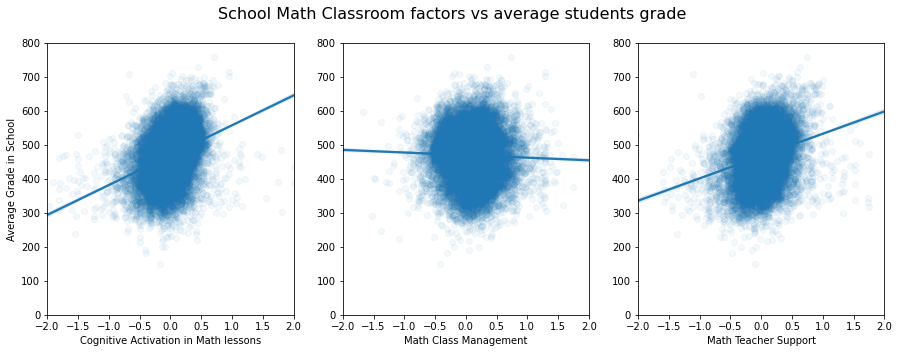

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sb.regplot(data = df2, y = 'grade', x = 'math_cog_activation', scatter_kws={'alpha':1/20})
plt.ylim(0,800)
plt.xlim(-2,2)
plt.ylabel('Average Grade in School')
plt.xlabel("Cognitive Activation in Math lessons")

plt.subplot(1,3,2)
sb.regplot(data = df2, y = 'grade', x = 'm_class_management', scatter_kws={'alpha':1/20})
plt.ylim(0,800)
plt.xlim(-2,2)
plt.ylabel('')
plt.xlabel('Math Class Management')


plt.subplot(1,3,3)
sb.regplot(data = df2, y = 'grade', x = 'math_techer_supp', scatter_kws={'alpha':1/20})
plt.ylim(0,800)
plt.xlim(-2,2)
plt.ylabel('')
plt.xlabel('Math Teacher Support')


plt.suptitle('School Math Classroom factors vs average students grade', fontsize=16)

# Display a figure.
plt.show();

<h4>Math Teacher support and Cognitive activation in math lessons both positively affect students grade.
    <br><br>
    It looks like math classroom management is centered but with slight negative correlation, Students would benefit from more freedom in asking questions and requesting elaboration.
    


 ## Schools and Teachers have important role to play towards learning capabilities of students. Their roles includes 
 - promoting active learning, 
 - promoting success.
 - developing thinking skills.
 - creating effective learning zones.
 - Student support and providing effective feedback.
 - developing good relationship.
 - enhancing motivation.
 - accepting individual differences.

# Learning is influenced by social interactions, interpersonal relations, and communication with others. Learning can be enhanced when the learner has an opportunity to interact and to collaborate with others on instructional tasks. 

# Thank You

In [12]:
!jupyter nbconvert PISA_2012.ipynb --to slides --no-input

[NbConvertApp] Converting notebook PISA_2012.ipynb to slides
[NbConvertApp] Writing 1136992 bytes to PISA_2012.slides.html
